#  **INTRODUCCIÓN:** 

En este EDA se pretenden demostrar 4 hipótesis. Para ello, se ha trabajado con varios datasets, que se han ido limpiando y trabajando tal y como se muestra a continuación.

Los datasets originales se encuentran en la carpeta "*data*", mientras que los modificados están en "*data_clean*".

Como primer paso, se importan todas las librerías y csv necesarios. Para facilitar la lectura, se importan en el mismo orden en que aparecen en la carpeta data, si bien para demostrar las hipótesis, se usan indistintamente.

Asimismo, vamos a crear una lista de colores, basados en las casas y en invierno y verano, para usar en todas las gráficas, aportando coherencia estética.

In [332]:
GOTcolors = [
    "#1C1C1C",  # Negro (Noche / Guardia de la Noche)
    "#8B0000",  # Rojo oscuro (Casa Baratheon)
    "#4682B4",  # Azul acero (Casa Stark, invierno)
    "#DAA520",  # Dorado (Casa Lannister)
    "#708090",  # Gris pizarra (Hierro / Casa Greyjoy)
    "#013220",  # Verde oscuro (Casa Tyrell / naturaleza)
    "#2F4F4F",  # Gris oscuro (batallas, oscuridad)
    "#A52A2A",   # Marrón rojizo (sangre, tierra)
    "#00CED1",  # Azul hielo más intenso (Caminantes Blancos / Invierno)
    "#CD853F",   # Marrón dorado (verano, desierto / Daenerys)
    "#4B0082",  # Índigo oscuro (Casa Targaryen, magia, fuego valyrio)
    "#C0C0C0",  # Plata (tramas de nobleza, armaduras, escarcha)
    "#5D3A00",  # Marrón oscuro (madera, castillos, la Guardia Real)
    "#191970",  # Azul medianoche (La larga noche, Caminantes Blancos)
    "#800000",  # Burdeos (sangre seca, poder, guerra)
    "#556B2F",   # Verde oliva oscuro (naturaleza salvaje, tierras del Norte)
]

In [333]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import LinearSegmentedColormap

In [334]:
df_battles = pd.read_csv('../data/battles.csv')
df_episodes = pd.read_csv('../data/episodes.csv')
df_epi_deaths = pd.read_csv('../data/episodios_y_muertes.csv')
df_muertes_epi1 = pd.read_csv('../data/muertes_x_episodio1.csv')
df_muertes_epi2 = pd.read_csv('../data/muertes_x_episodio2.csv')
df_viewers = pd.read_csv('../data/viewers.csv')

## 🧹LIMPIEZA DE DATAFRAMES:

### Batallas

In [335]:
df_battles_clean = df_battles.drop(["year","battle_number","location","region","major_capture","battle_type","attacker_2","attacker_3","attacker_4","defender_2","defender_3","defender_4","note"], axis=1)
df_battles_clean.to_csv("../data_clean/df_battles_clean.csv", index=False)

### Episodes

In [336]:
df_episodes_clean = df_episodes.drop(["Ordered","Filming Duration","Original Air Date","Running Time (Minutes)","Directed by","Written by","Music by","Cinematography by","Editing by","Synopsis"], axis=1)

La columna "Rotten Tomatoes Rating (Percentage)" nos alteraría los resultados, ya que no está en la misma escala que las columnas 5 y 6. Vamos a cambiarle el nombre y a equipararla a las otras:

In [337]:
#cambiar nombre a columna
df_episodes_clean.rename(columns={"Rotten Tomatoes Rating (Percentage)": "Rotten Tomatoes Rating"}, inplace=True)

#cambiar valores escala (sobre 10, no %)
df_episodes_clean["Rotten Tomatoes Rating"] = df_episodes_clean["Rotten Tomatoes Rating"] / 10


In [338]:
df_episodes_clean.to_csv("../data_clean/df_episodes_clean.csv", index=False)

### Episodios y muertes

In [339]:
df_epi_deaths_clean = df_epi_deaths.drop(["Director","Writer","Original Air Date","IMDB Description"], axis=1)
df_epi_deaths_clean.to_csv("../data_clean/df_epi_deaths_clean.csv", index=False)

### Muertes por episodio 1

Lo primero que observamos es que la mayoría de las columnas tienen su nombre como primer registro. Arreglemos eso:

In [340]:
#CAMBIAR NOMBRES COLUMNAS POR 1º REGISTROS

# Reemplazar los nombres de las columnas desde la posición 2 en adelante con los valores de la primera fila
df_muertes_epi1.columns = list(df_muertes_epi1.columns[:2]) + list(df_muertes_epi1.iloc[0, 2:])

# Eliminar la primera fila (ya que la usamos como cabecera)
df_muertes_epi1 = df_muertes_epi1[1:]

# Reiniciar el índice
df_muertes_epi1 = df_muertes_epi1.reset_index(drop=True)
df_muertes_epi1

,index,game-of-thones-deaths,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,4,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,5,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...,...
2219,2220,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,2221,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,2222,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,2223,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


También cabe destacar que "game-of-thones-deaths", que hace referencia a las casas de quienes perecen, es la columna con más NaNs.

In [341]:
list(df_muertes_epi1['Name'].unique())

['Waymar Royce',
 'Gared',
 'Will',
 'Stag',
 'Direwolf',
 'Jon Arryn',
 'Dothraki man',
 'Catspaw assassin',
 'Mycah',
 'Lady',
 'Ser Hugh of the Vale',
 "Clegane's horse",
 'Stark soldier',
 'Tribesman',
 'Lannister soldier',
 'Jory Cassel',
 'Wallen',
 'Wildling',
 'Stiv',
 'Vardis Egen',
 'Viserys Targaryen',
 'Robert Baratheon',
 'Vayon Poole',
 'Stark staff member',
 'Septa Mordane',
 'Syrio Forel',
 'Stableboy',
 'Othor',
 'Jafer Flowers',
 'Mago',
 "Drogo's horse",
 'Qotho',
 'Pigeon',
 'Ned Stark',
 'Rhaego',
 'Khal Drogo',
 'Mirri Maz Duur',
 'Knight',
 'The Silver',
 'Maester Cressen',
 'Barra (Baratheon illegitimate son)',
 "Robert Baratheon's illegitimate son",
 'Rakharo',
 'Yoren',
 "Night's Watch recruit",
 'Lommy Greenhands',
 'Rennick',
 'Prisoner',
 'Renly Baratheon',
 "Baratheon of Storm's End guard",
 'The Tickler',
 'Rodrik Cassel',
 'High Septon',
 'Peasant',
 'Amory Lorch',
 'Drennan',
 'Irri',
 'Alton Lannister',
 'Torrhen Karstark',
 'The Spice King',
 'The Sil

In [342]:
secundarios = ['Golden Company soldier','Golden Company horse', "King's Landing Citizen",
               'Unsullied','Undead Polar Bear', 'Greyjoy Soldier','Frey family member',
               "King's Landing Noble", 'Stark Soldier', 'The Masters Soldier','Meereen citizen',
               'Faith Militant Brother','Brotherhood Without Banners Member', 'Gladiator','Horse',
               'Stone Man', 'Unsullied Soldier', 'Second Sun Mercenary','Dorne Smuggler','Dorne Horse',
               'Dorne Soldier','Snake', 'Rat','Meereen slave','Sons of the Harpy agent','Unamed Dwarf',
               'Baelish soldier', 'Greyjoy soldier', "Night's Watch brother","Night's Watch mutineer",
               'Meereen slave master','Champion of Meereen',"Champion of Meereen's Horse",'Deer','Dragonstone citizen',
                'Unborn Stark child','Yunkai soldier','Horse breeder','White Walker','Astapor slaver',
                'Bolton soldier',"Baratheon of King's Landing soldier",'Baratheon of Dragonstone soldier',
                'Member of the Thirteen',"Baratheon of Storm's End guard",'Prisoner',"Night's Watch recruit",
                "Drogo's horse",'Stark staff member', 'Stableboy',"Olly's mum",'Wildling','Lannister soldier',
                'Tribesman','Stark soldier',"Clegane's horse",'Lady','Dothraki man','Direwolf','Stag']

In [343]:
df_muertes_epi1_clean = df_muertes_epi1[~df_muertes_epi1['Name'].isin(secundarios)]
df_muertes_epi1_clean

,index,game-of-thones-deaths,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
5,6,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1
7,8,NaN,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
...,...,...,...,...,...,...,...,...,...,...
1979,1980,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8
1980,1981,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8
1981,1982,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8
1995,1996,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8


In [344]:
df_muertes_epi1_clean.to_csv("../data_clean/df_muertes_epi1_clean.csv", index=False)

### Muertes por episodio 2

In [345]:
df_muertes_epi2_clean = df_muertes_epi2.drop(["reason","allegiance"], axis=1)
df_muertes_epi2_clean.to_csv("../data_clean/df_muertes_epi2_clean.csv", index=False)

### Viewers

In [346]:
df_viewers_clean = df_viewers.drop(["Original air date [20]"], axis=1)
df_viewers_clean.to_csv("../data_clean/df_viewers_clean.csv", index=False)

## 🔗FUSIÓN DATAFRAMES

In [347]:
df_muertes_epi2_merge = pd.read_csv('../data/muertes_x_episodio2.csv')
df_muertes_epi2_merge_clean = df_muertes_epi2_merge.drop(["order","season","character_killed","killer","method","reason","location","importance","allegiance"], axis=1)
df_muertes_epi2_merge_clean.to_csv("../data_clean/df_muertes_epi2_merge_clean.csv", index=False)

In [348]:
df_viewers_merge = pd.read_csv('../data/viewers.csv')
df_viewers_merge_clean = df_viewers_merge.drop(["Unnamed: 0", "No.overall", "Title", "Directed by", "Written by", "Original air date [20]", "Season"],axis=1)
df_viewers_merge_clean.rename(columns={"No. inseason": "episode"}, inplace=True)
df_viewers_merge_clean.to_csv("../data_clean/df_viewers_merge_clean.csv")

In [349]:
# Join many-to-one: se añaden los datos de viewers al dataframe de muertes por episodio
df_muertes_y_viewers = df_muertes_epi2_merge_clean.merge(df_viewers_merge_clean, on='episode', how='left')

# 🗡 **HIPÓTESIS 1:** 
### Existe una relación entre el éxito de las temporadas y el número de muertes de personajes que se dan en las mismas

In [350]:
df_epi_deaths

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,69,2,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019",10.29,58,Jaime faces judgment and Winterfell prepares f...,118605,7.9,0
69,8,70,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02,82,The Night King and his army have arrived at Wi...,198482,7.5,7
70,8,71,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80,78,The Battle of Winterfell is over and a new cha...,151229,5.5,2
71,8,72,5,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.40,78,Forces have arrived at King's Landing for the ...,176140,6.0,7


In [351]:
df_epi_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                73 non-null     int64  
 1   Episode Number        73 non-null     int64  
 2   Number in Season      73 non-null     int64  
 3   Episode Name          73 non-null     object 
 4   Director              73 non-null     object 
 5   Writer                73 non-null     object 
 6   Original Air Date     73 non-null     object 
 7   US viewers (million)  73 non-null     float64
 8   Runtime (mins)        73 non-null     int64  
 9   IMDB Description      73 non-null     object 
 10  IMDB votes            73 non-null     int64  
 11  Imdb Rating           73 non-null     float64
 12  Notable Death Count   73 non-null     int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 7.5+ KB


Generamos un heatmap para ver distintas correlaciones y sacar conclusiones:

Text(0.5, 1.0, 'HEATMAP CORRELACIONES 1')

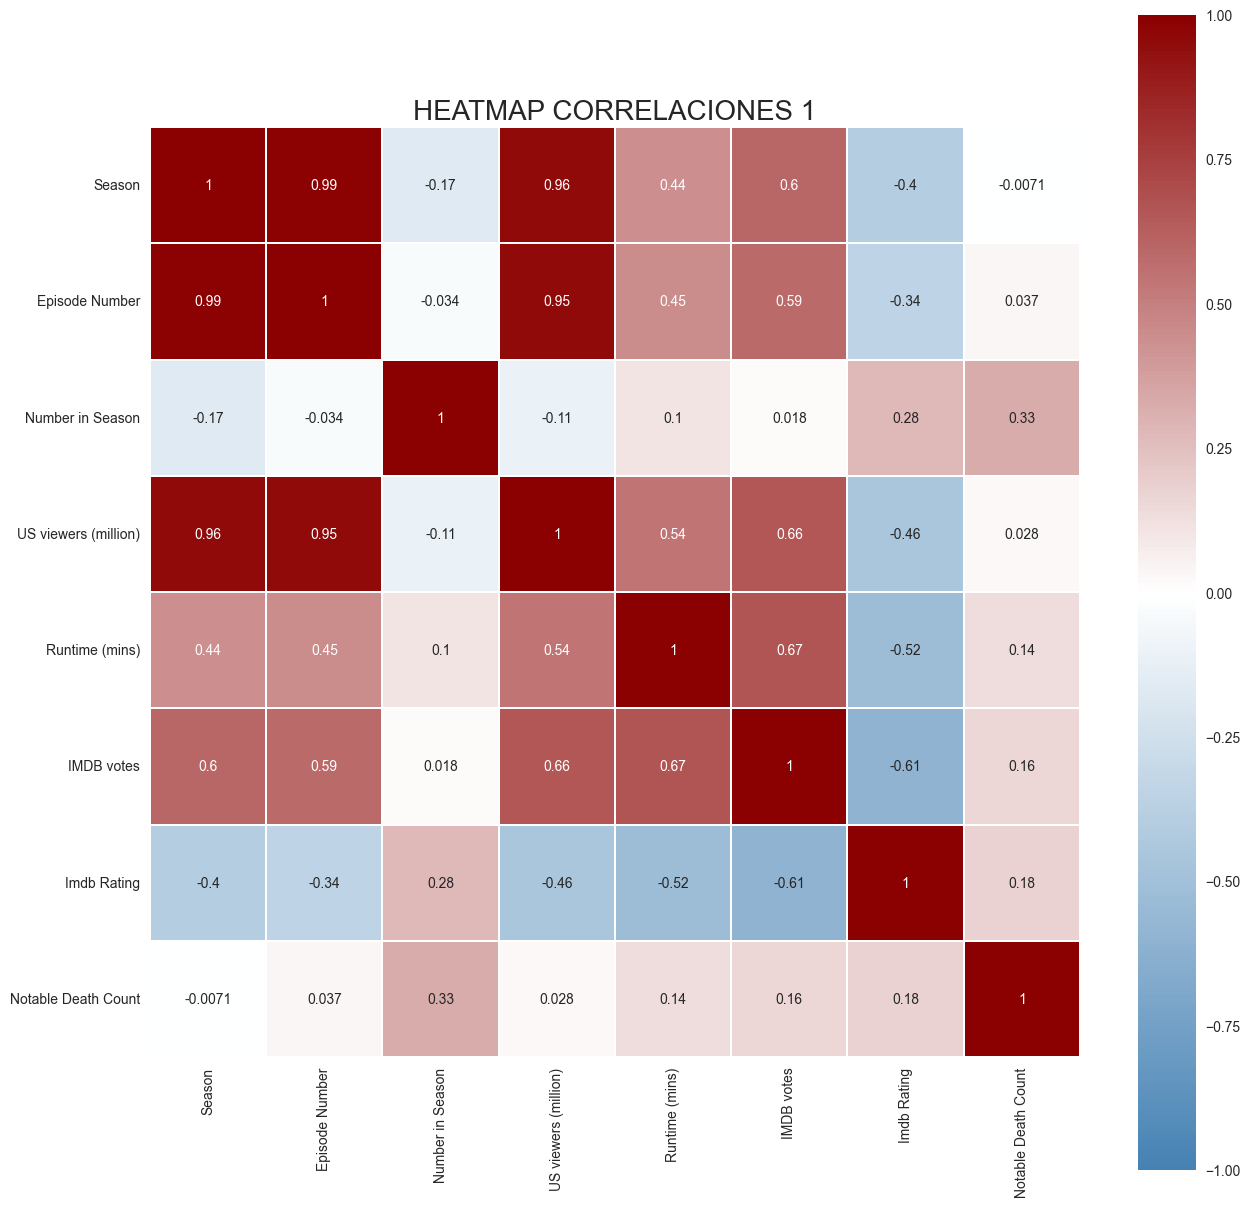

In [352]:
colors = ["#4682B4", "white", "#8B0000"]  
custom_cmap = LinearSegmentedColormap.from_list("got_cmap", colors, N=256)


corr = df_epi_deaths_clean.select_dtypes(include='number').corr()


plt.figure(figsize=(15, 15))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap=custom_cmap,
            square=True,
            linewidths=.1,
            annot=True);
plt.title("HEATMAP CORRELACIONES 1", fontsize=20)


se ve como el imdb rating baja segun aumentan los espectadores (segun avanza la serie)
no hay nada muy reseñable, pero se observa que a medida que avanza cada temporada el numero de muertes auemnta y el imdb ratin tb.las muertes aumentan muuy pco a medida que avanza la serire los finales de temporada gustan mas. las muertes aumentan muuy pco a medida que avanza la serire. episodios mas largos tbtienen peor valoracion, pero cuando hay muertes importantes, mejora algo

## ❔ ¿Los episodios con más muertes han tenido mayor audiencia?

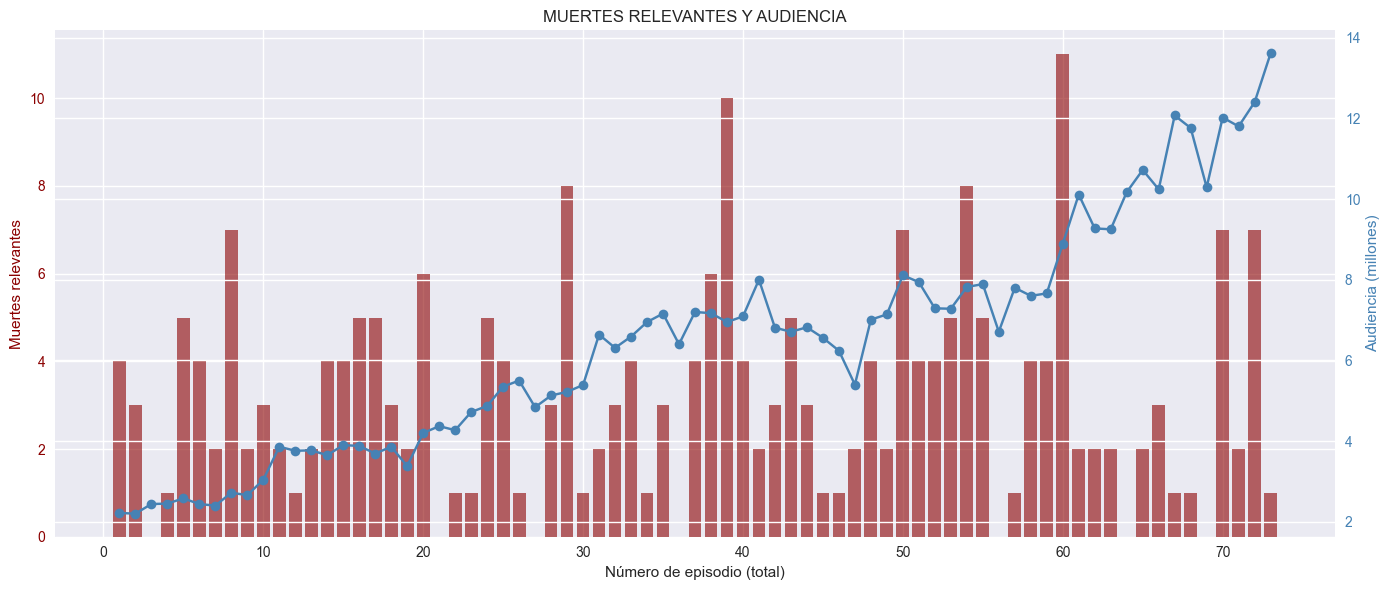

In [353]:
# Ordenar el DataFrame por episodio (por si acaso)
df = df_epi_deaths.sort_values(by=["Season", "Number in Season"])

# Crear la figura y eje principal
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje 1: muertes (barra)
ax1.bar(df['Episode Number'], df['Notable Death Count'], color="#8B0000", alpha=0.6, label='Muertes')
ax1.set_xlabel('Número de episodio (total)')
ax1.set_ylabel('Muertes relevantes', color="#8B0000")
ax1.tick_params(axis='y', labelcolor="#8B0000")

# Eje 2: audiencia (línea)
ax2 = ax1.twinx()
ax2.plot(df['Episode Number'], df['US viewers (million)'], color="#4682B4", marker='o', label='Audiencia')
ax2.set_ylabel('Audiencia (millones)', color="#4682B4")
ax2.tick_params(axis='y', labelcolor="#4682B4")

# Título y formato
plt.title('MUERTES RELEVANTES Y AUDIENCIA')
fig.tight_layout()
plt.show()

aparentemente no está relacionado

## ❔ ¿Los episodios con más muertes han tenido mejor valoración?

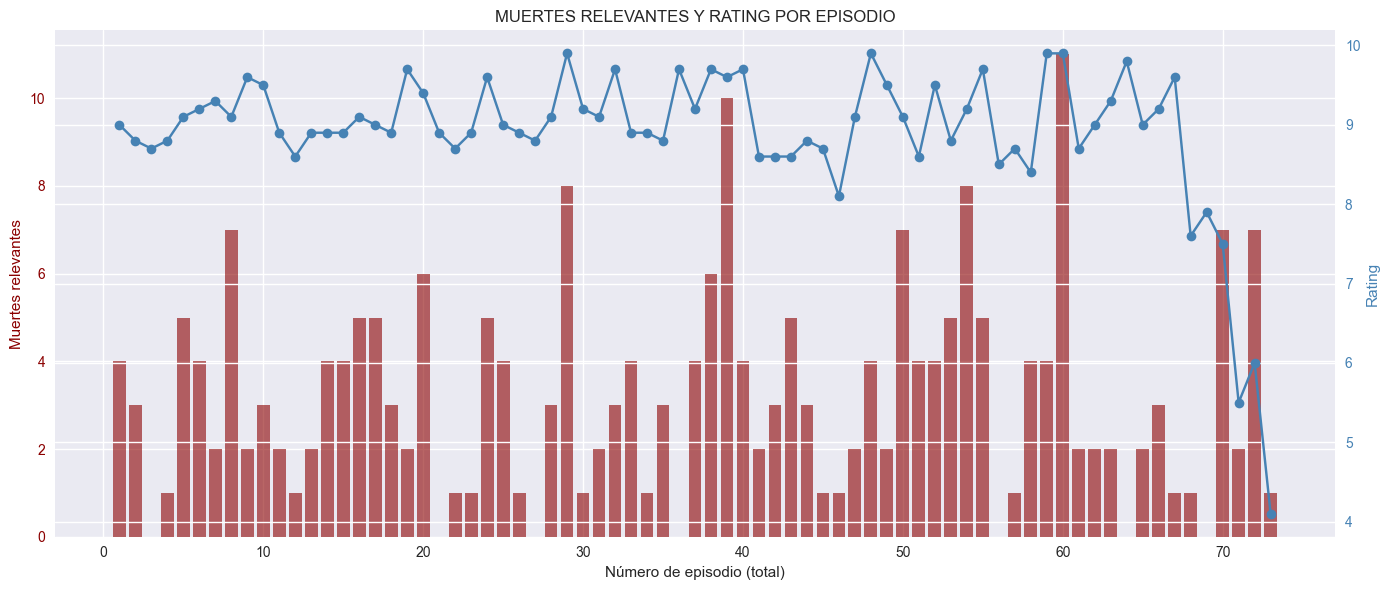

In [354]:
# Ordenar el DataFrame por episodio (por si acaso)
df = df_epi_deaths.sort_values(by=["Season", "Number in Season"])

# Crear la figura y eje principal
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje 1: muertes (barra)
ax1.bar(df['Episode Number'], df['Notable Death Count'], color="#8B0000", alpha=0.6, label='Muertes')
ax1.set_xlabel('Número de episodio (total)')
ax1.set_ylabel('Muertes relevantes', color="#8B0000")
ax1.tick_params(axis='y', labelcolor="#8B0000")

# Eje 2: audiencia (línea)
ax2 = ax1.twinx()
ax2.plot(df['Episode Number'], df['Imdb Rating'], color="#4682B4", marker='o', label='Audiencia')
ax2.set_ylabel('Rating', color="#4682B4")
ax2.tick_params(axis='y', labelcolor="#4682B4")

# Título y formato
plt.title('MUERTES RELEVANTES Y RATING POR EPISODIO')
fig.tight_layout()
plt.show()

Parece que algo sí

## ❔ ¿Cuándo ha habido más muertes relevantes?

hacia el final de cada temporada aumentan algo mas. segun avanza la serie, aumentan pero no exagerado

In [355]:
muertes_por_episodio = df_epi_deaths.groupby("Number in Season")["Notable Death Count"].sum()
print(muertes_por_episodio)

Number in Season
1     17
2     17
3     26
4     24
5     31
6     15
7     15
8     27
9     28
10    32
Name: Notable Death Count, dtype: int64


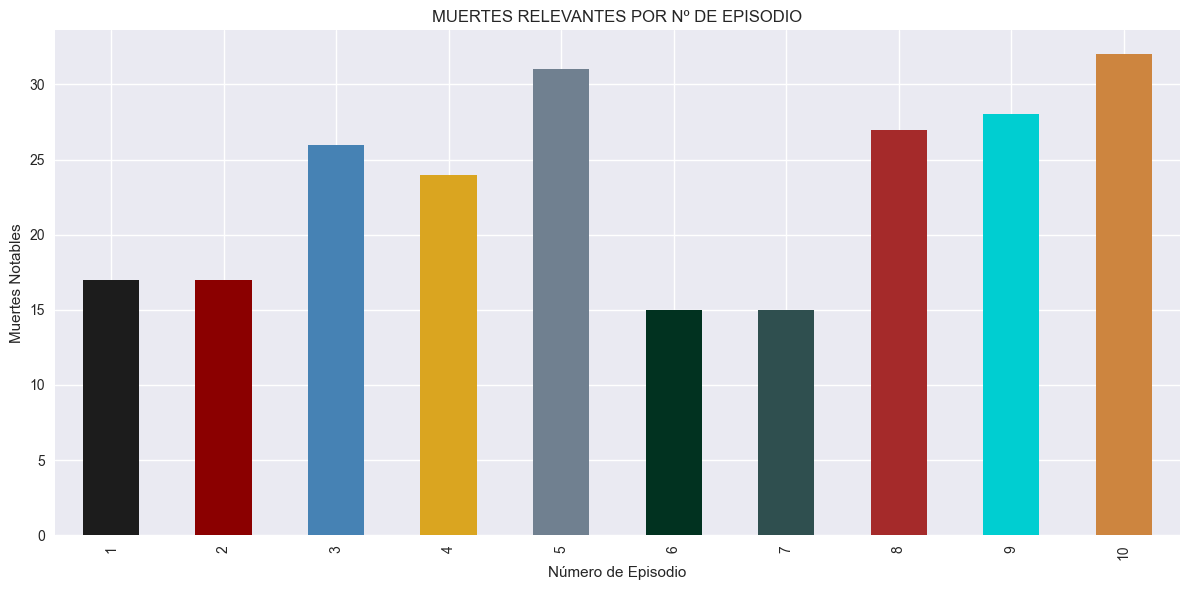

In [356]:
muertes_por_episodio.plot(kind="bar", figsize=(12, 6), color=GOTcolors)
plt.xlabel("Número de Episodio")
plt.ylabel("Muertes Notables")
plt.title("MUERTES RELEVANTES POR Nº DE EPISODIO")
plt.tight_layout()



La mitad y el final de las temporadas son los episodios que más muertes acumulan

## ❔ ¿Cuántas muertes ha habido en cada temporada?¿Y en cada episodio?

Para obtener estos datos, trabajamos con otro dataframe. Vamos a sacar dos tipos de datos, el de muertes relevantes (se ha considerado relevante a personajes con nombre propio) y generales.

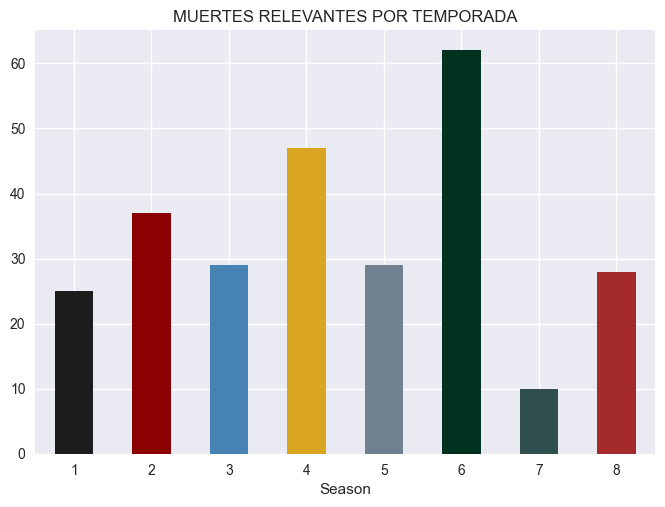

In [357]:
num_barras = len(df_muertes_epi1_clean['Season'].value_counts())

df_muertes_epi1_clean['Season'].value_counts().sort_index().plot(
    kind='bar', 
    title='MUERTES RELEVANTES POR TEMPORADA',
    color=GOTcolors[:num_barras])
plt.xticks(rotation=0);

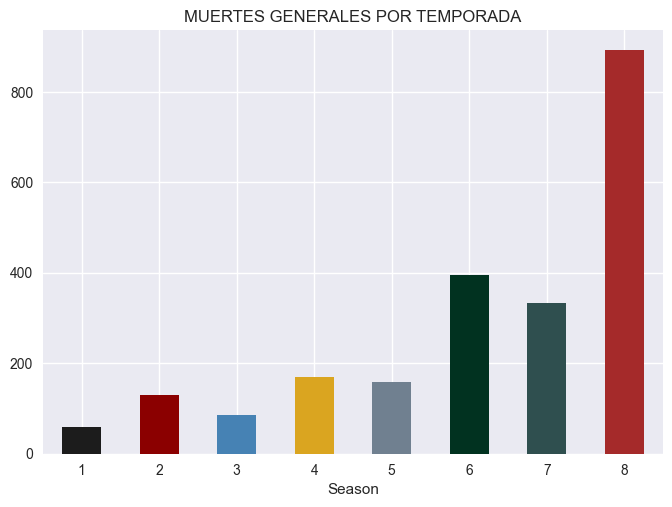

In [358]:
num_barras = len(df_muertes_epi1['Season'].value_counts())

df_muertes_epi1['Season'].value_counts().sort_index().plot(
    kind='bar', 
    title='MUERTES GENERALES POR TEMPORADA',
    color=GOTcolors[:num_barras])
plt.xticks(rotation=0)
plt.show()

<Axes: title={'center': 'MUERTES POR EPISODIO'}, xlabel='episode'>

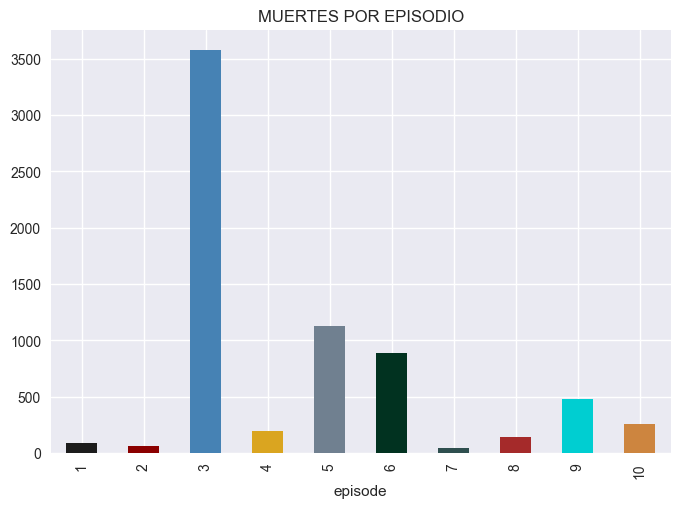

In [359]:
df_muertes_epi2_clean['episode'].value_counts().sort_index().plot(kind='bar', title='MUERTES POR EPISODIO', color = GOTcolors)

## ❔ ¿Qué tipo de muertes han tenido más audiencia?

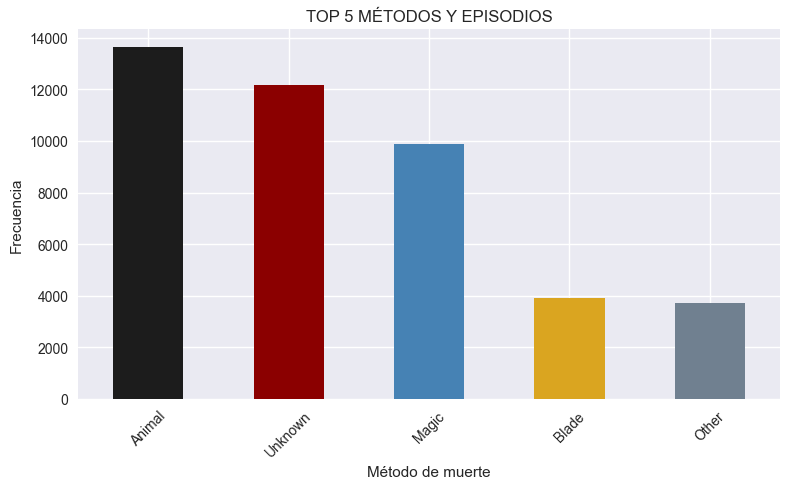

In [360]:
# Paso 1: obtener los 5 episodios con más audiencia
top_5_episodios = df_muertes_y_viewers.groupby("episode")["U.S. viewers(millions)"].mean().nlargest(5).index

# Paso 2: filtrar el DataFrame original
top_df = df_muertes_y_viewers[df_muertes_y_viewers["episode"].isin(top_5_episodios)]

# Paso 3: contar los métodos de muerte en esos episodios
metodos_top5 = top_df["method_cat"].value_counts().head(5)

# Paso 4: graficar
plt.figure(figsize=(8,5))
metodos_top5.plot(kind="bar", color=GOTcolors)
plt.title("TOP 5 MÉTODOS Y EPISODIOS")
plt.xlabel("Método de muerte")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

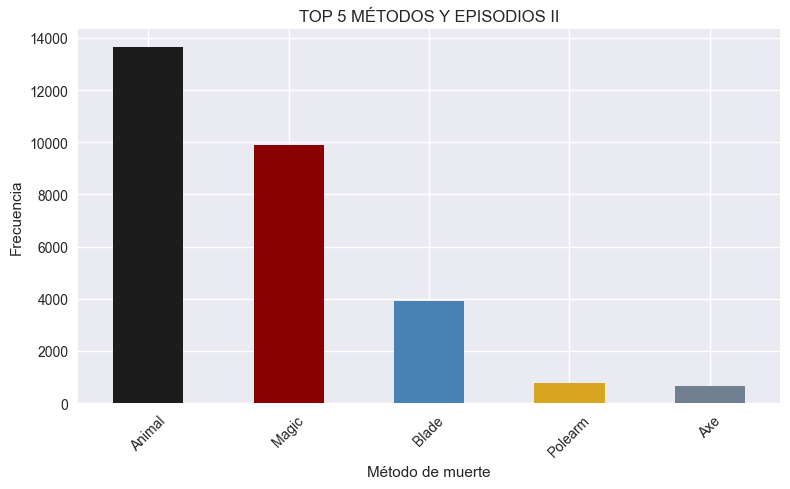

In [361]:
df_filtrado = df_muertes_y_viewers[~df_muertes_y_viewers["method_cat"].isin(["Unknown", "Other"])]
# Paso 1: obtener los 5 episodios con más audiencia
top_5_episodios = df_filtrado.groupby("episode")["U.S. viewers(millions)"].mean().nlargest(5).index

# Paso 2: filtrar el DataFrame original
top_df = df_filtrado[df_filtrado["episode"].isin(top_5_episodios)]

# Paso 3: contar los métodos de muerte en esos episodios
metodos_top5 = top_df["method_cat"].value_counts().head(5)

# Paso 4: graficar
plt.figure(figsize=(8,5))
metodos_top5.plot(kind="bar", color=GOTcolors)
plt.title("TOP 5 MÉTODOS Y EPISODIOS II")
plt.xlabel("Método de muerte")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [362]:
muertes_por_magia = df_muertes_epi2_clean[df_muertes_epi2_clean["method_cat"] == "Magic"]
print(muertes_por_magia)

      order  season  episode                      character_killed  \
56       57       1       10                                Rhaego   
78       79       2        5                       Renly Baratheon   
448     449       4       10                                 Wight   
449     450       4       10                                 Wight   
451     452       4       10                                 Wight   
...     ...     ...      ...                                   ...   
5856   5857       8        3                                 Wight   
5857   5858       8        3                                 Wight   
5858   5859       8        3                                 Wight   
5859   5860       8        3                                 Wight   
5861   5862       8        3  Melisandre “the Red Woman” of Asshai   

                                    killer          method method_cat  \
56                          Mirri Maz Duur           Magic      Magic   
78    Melisan

## 📊 CONCLUSIÓN: 

En principio no existe una relación clara entre el número de muertes y el éxito de las temporadas o capítulos. Aunque en algunos capítulos con más muertes la valoración sube, existen muichos capítulos con escasas muertes que están igual de bien valorados. Lo que está claro es que el considerable aumento de muertes al final de la serie no tuvo nigún impacto en sus malas críticas.

Las muertes aumentan a mitad y al final de cada temporada


# 🗡 **HIPÓTESIS 2:**
### La calidad de las temporadas ha disminuido

NOTA:

Rotten Tomatoes: votan tanto críticos como usuarios por separado, si bien no se especifica a quién pertenecen los datos mostrados en el csv.
Metacritic: votan tanto críticos como usuarios e integra las valoraciones
IMDb: votan usuarios

In [363]:
df_episodes

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,57,David Nutter,Bryan Cogman,21-Apr-2019,10.29,Ramin Djawadi,David Franco,Crispin Green,7.9,87,5.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Jaime reveals Cersei's deception to the Targar...
69,8,3,70,The Long Night,81,Miguel Sapochnik,"David Benioff, D. B. Weiss",28-Apr-2019,12.02,Ramin Djawadi,Fabian Wagner,Tim Porter,7.5,74,4.2,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,The living meet the Army of the Dead outside W...
70,8,4,71,The Last of the Starks,77,David Nutter,"David Benioff, D. B. Weiss",5-May-2019,11.80,Ramin Djawadi,David Franco,Katie Weiland,5.5,58,2.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,"The survivors mourn, burn the dead and then ce..."
71,8,5,72,The Bells,77,Miguel Sapochnik,"David Benioff, D. B. Weiss",12-May-2019,12.48,Ramin Djawadi,Fabian Wagner,Tim Porter,6.0,49,3.4,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Varys urges Jon to advance his claim to the th...


In [364]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Season                               73 non-null     int64  
 1   No. of Episode (Season)              73 non-null     int64  
 2   No. of Episode (Overall)             73 non-null     int64  
 3   Title of the Episode                 73 non-null     object 
 4   Running Time (Minutes)               73 non-null     int64  
 5   Directed by                          73 non-null     object 
 6   Written by                           73 non-null     object 
 7   Original Air Date                    73 non-null     object 
 8   U.S. Viewers (Millions)              73 non-null     float64
 9   Music by                             73 non-null     object 
 10  Cinematography by                    73 non-null     object 
 11  Editing by                        

In [365]:
df_episodes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    73 non-null     int64  
 1   No. of Episode (Season)   73 non-null     int64  
 2   No. of Episode (Overall)  73 non-null     int64  
 3   Title of the Episode      73 non-null     object 
 4   U.S. Viewers (Millions)   73 non-null     float64
 5   IMDb Rating               73 non-null     float64
 6   Rotten Tomatoes Rating    73 non-null     float64
 7   Metacritic Ratings        73 non-null     float64
 8   Novel(s) Adapted          73 non-null     object 
dtypes: float64(4), int64(3), object(2)
memory usage: 5.3+ KB


## ❔ ¿Qué tendencia ha seguido la calidad de las temporadas?

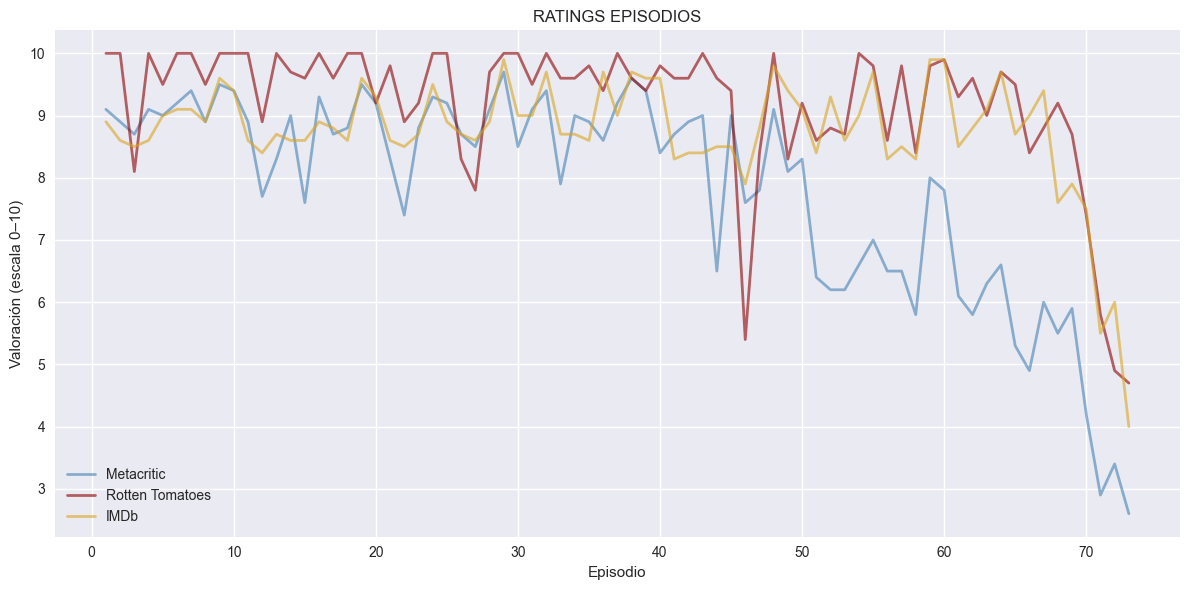

In [366]:
plt.figure(figsize=(12, 6))

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Metacritic Ratings'], 
         color='#4682B4', alpha=0.6, label='Metacritic', linewidth=2)

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Rotten Tomatoes Rating'], 
         color='#8B0000', alpha=0.6, label='Rotten Tomatoes', linewidth=2)

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['IMDb Rating'], 
         color='#DAA520', alpha=0.6, label='IMDb', linewidth=2)

plt.xlabel('Episodio')
plt.ylabel('Valoración (escala 0–10)')
plt.title('RATINGS EPISODIOS')
plt.legend()
plt.tight_layout()
plt.show()

La calidad de las temporadas se ha mantenido relativamente constante, si la comparamos con la última temporada, donde la caída es muy pronunciada.



Veamos la media de las valoraciones. Para ello, crearemos una columna nueva:

In [367]:
df_episodes_clean["Average Rating"] = df_episodes_clean[["IMDb Rating", "Metacritic Ratings", "Rotten Tomatoes Rating"]].mean(axis=1)

In [368]:
df_episodes_clean.to_csv("../data_clean/df_episodes_clean.csv", index=False)

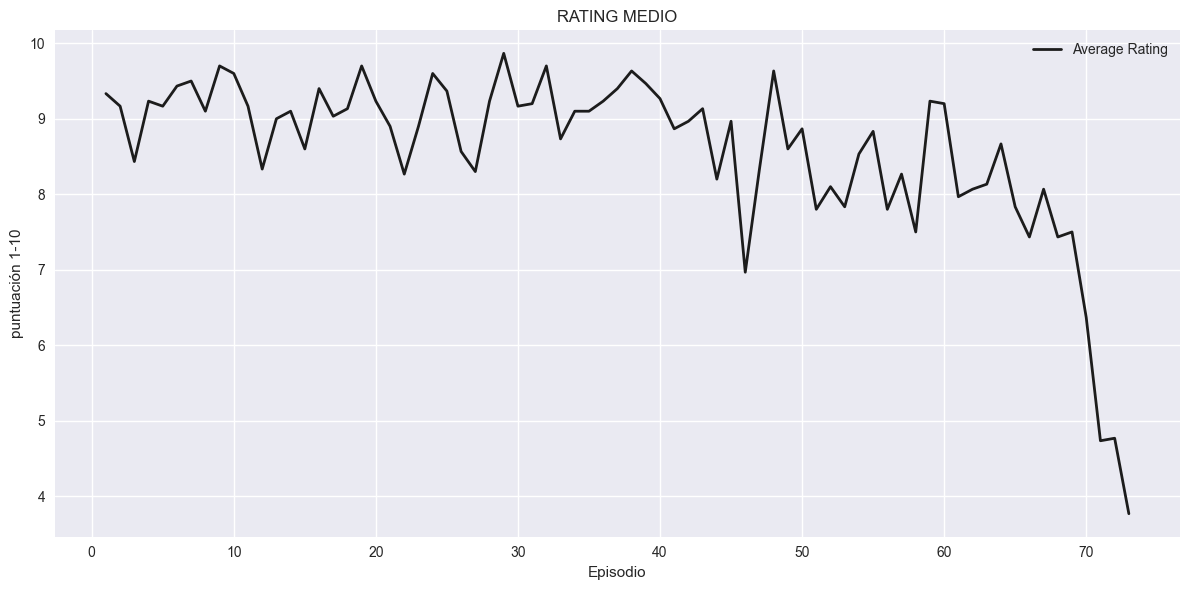

In [369]:
plt.figure(figsize=(12, 6))

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['Average Rating'], 
         color="#1C1C1C", alpha=1, label='Average Rating', linewidth=2)


plt.xlabel('Episodio')
plt.ylabel('puntuación 1-10')
plt.title('RATING MEDIO')
plt.legend()
plt.tight_layout()
plt.show()

## ❔¿Ha habido episodios mal valorados?¿Por qué?

En el primer gráfico se observa una fuerte caída en el rating de Rotten Tomatoes entre las celdas 40 y 50. Veamos a qué episodio corresponde:

In [370]:
worstRT1 = df_episodes_clean["Rotten Tomatoes Rating"].iloc[40:50].min()
df_episodes_clean.iloc[40:50][df_episodes_clean["Rotten Tomatoes Rating"].iloc[40:50] == worstRT1]


,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating,Metacritic Ratings,Novel(s) Adapted,Average Rating
45,5,6,46,"Unbowed, Unbent, Unbroken",6.24,7.9,5.4,7.6,"A Feast for Crows, A Dance with Dragons and or...",6.966667


Cabe destacar que este episodio (E6T5) corresponde a la boda de Sansa Stark con Ramsay Bolton, con el consecuente abuso por parte de Ramsay hacia Sansa al final del episodio.

## ❔ ¿Cuántos espectadores ha tenido la serie?¿Se ha mantenido dicho número?

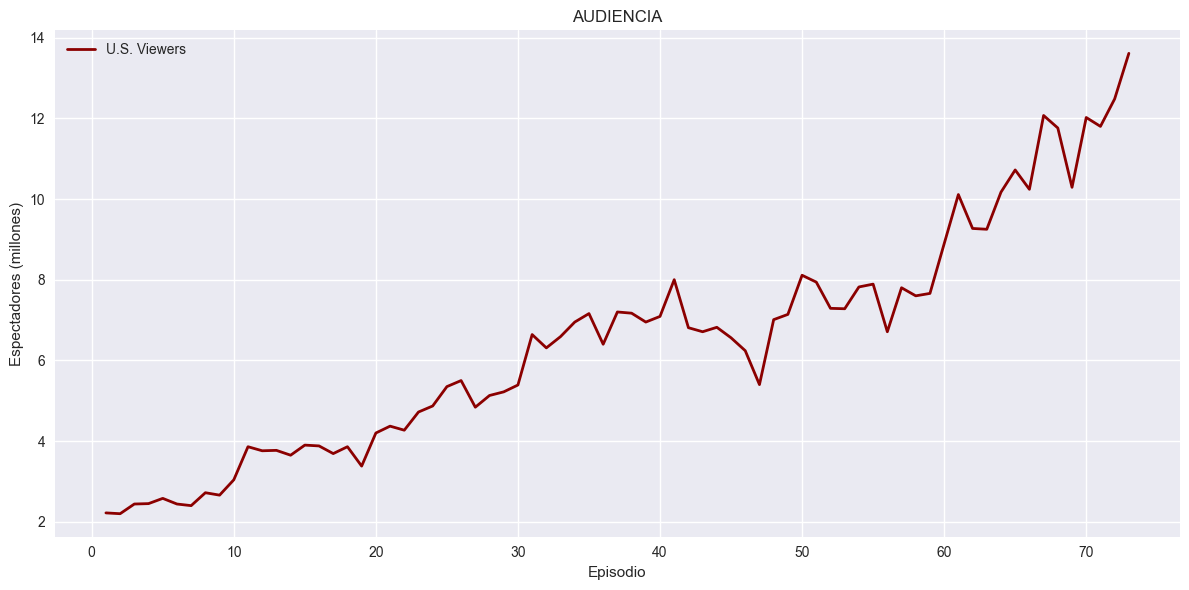

In [371]:
plt.figure(figsize=(12, 6))

plt.plot(df_episodes_clean['No. of Episode (Overall)'], df_episodes_clean['U.S. Viewers (Millions)'], 
         color="#8B0000", alpha=1, label='U.S. Viewers', linewidth=2)



plt.xlabel('Episodio')
plt.ylabel('Espectadores (millones)')
plt.title('AUDIENCIA')
plt.legend()
plt.tight_layout()
plt.show()

A pesar de que la puntuación al final descenció, los espectadores no dejaron de subir

## 📊 CONCLUSIÓN: 
Definitivamente, la hipótesis 2 se cumple con creces. La calidad de la última temporada sufre una caída en picado. Deja atrás lo que fue una serie de renombre para rematarla con un final mal cerrado y peor valorado, que deja claramente con mal sabor de boca a sus espectadores y con una media que no llega ni siquiera a un 4.

# 🗡 **HIPÓTESIS 3:** 
### La mayoría de muertes han sido por espada

NOTA: se hace distinción entre muertes generales y relevantes.

In [372]:
df_muertes_epi1 

,index,game-of-thones-deaths,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,4,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,5,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...,...
2219,2220,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,2221,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,2222,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,2223,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [373]:
df_muertes_epi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  2224 non-null   int64 
 1   game-of-thones-deaths  1792 non-null   object
 2   Death No.              2224 non-null   object
 3   Episode                2224 non-null   object
 4   Killer                 2214 non-null   object
 5   Killers House          2194 non-null   object
 6   Location               2224 non-null   object
 7   Method                 2224 non-null   object
 8   Name                   2224 non-null   object
 9   Season                 2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


## ❔ ¿Quién ha matado más?¿Cómo ha matado? 

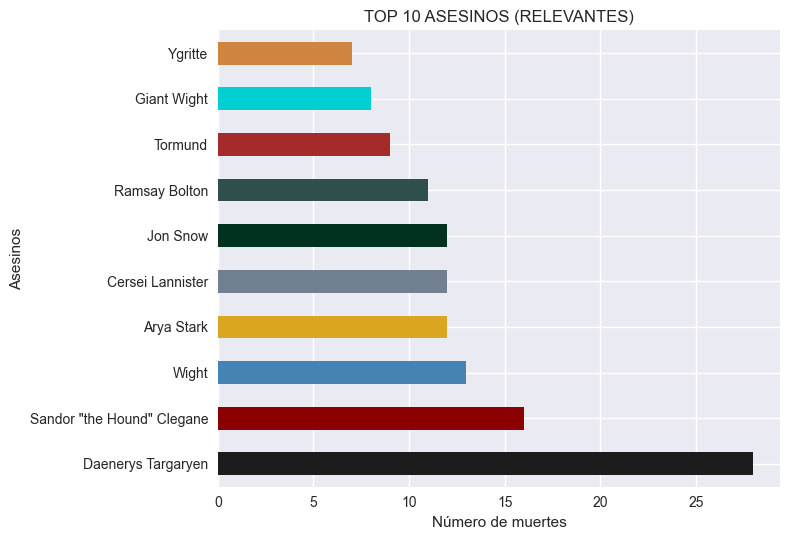

In [374]:
df_muertes_epi1_clean['Killer'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh',
          color=GOTcolors,
          title='TOP 10 ASESINOS (RELEVANTES)')
plt.xlabel('Número de muertes')
plt.ylabel('Asesinos')
plt.tight_layout()
plt.show()

daenerys mata la que más por sus dragones, y arya al matar al rey blanco, mata a todos sus caminantes

'plt.figure(figsize=(15,10))\nsns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)\nplt.title("Frecuencia de métodos por asesino")\nplt.xlabel("Método")\nplt.ylabel("Asesino")\nplt.tight_layout()\nplt.show()'

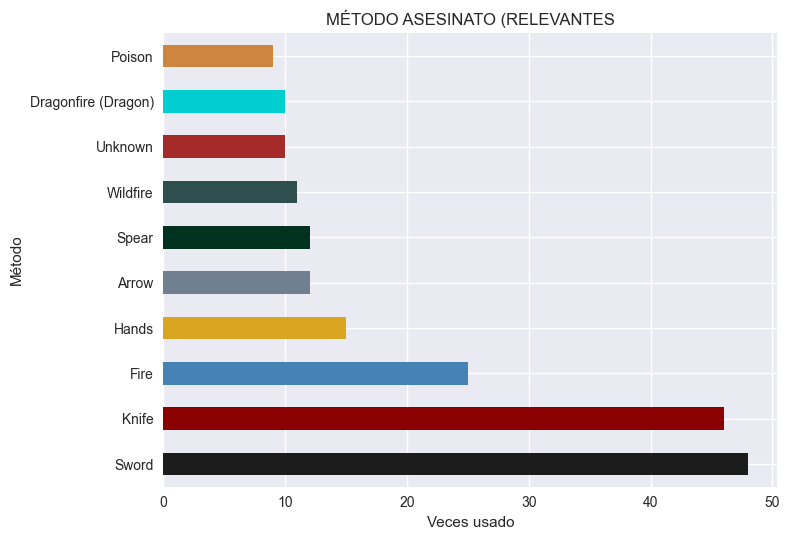

In [375]:
df_muertes_epi1_clean['Method'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh',
          color=GOTcolors,
          title='MÉTODO ASESINATO (RELEVANTES')
plt.xlabel('Veces usado')
plt.ylabel('Método')
plt.tight_layout()
heatmap_data = df_muertes_epi1_clean.pivot_table(index='Killer', columns='Method', aggfunc='size', fill_value=0)

"""plt.figure(figsize=(15,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Frecuencia de métodos por asesino")
plt.xlabel("Método")
plt.ylabel("Asesino")
plt.tight_layout()
plt.show()"""

Asesinatos generales:

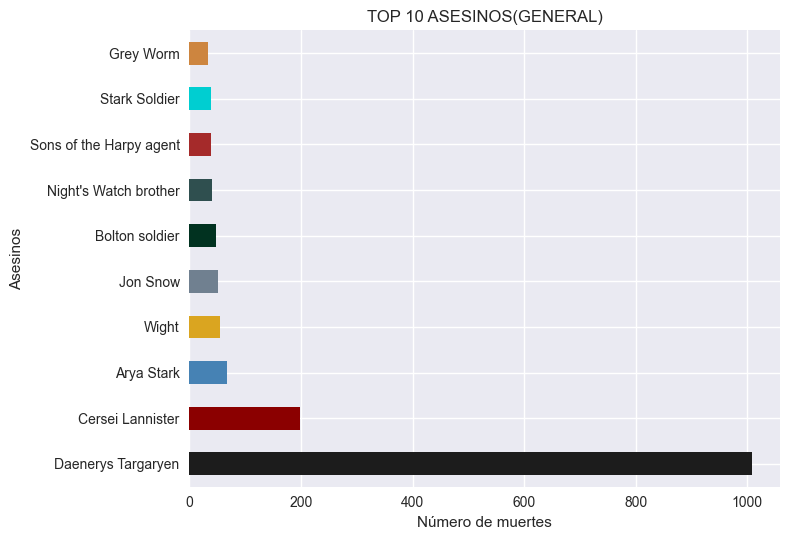

In [376]:
df_muertes_epi1['Killer'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh',
          color=GOTcolors,
          title='TOP 10 ASESINOS(GENERAL)')
plt.xlabel('Número de muertes')
plt.ylabel('Asesinos')
plt.tight_layout()
plt.show()

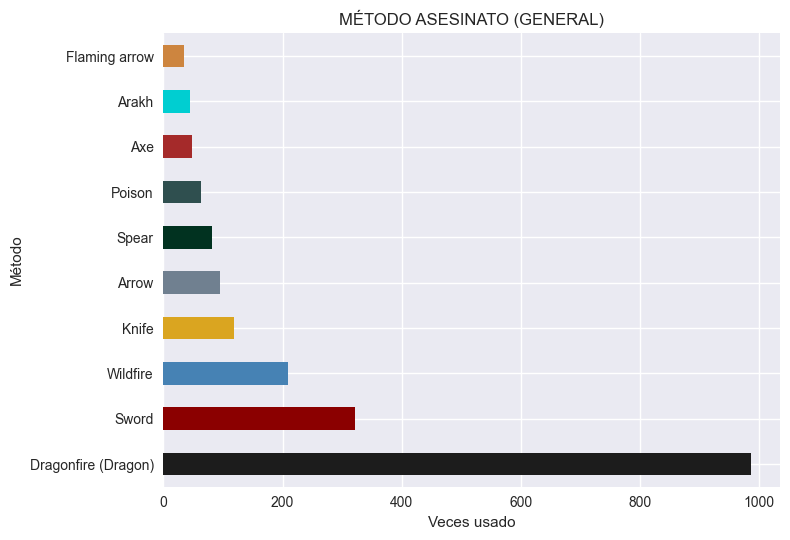

In [377]:
df_muertes_epi1['Method'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh',
          color=GOTcolors,
          title='MÉTODO ASESINATO (GENERAL)')
plt.xlabel('Veces usado')
plt.ylabel('Método')
plt.tight_layout()
plt.show()

## ❔ ¿Qué casa ha matado más?

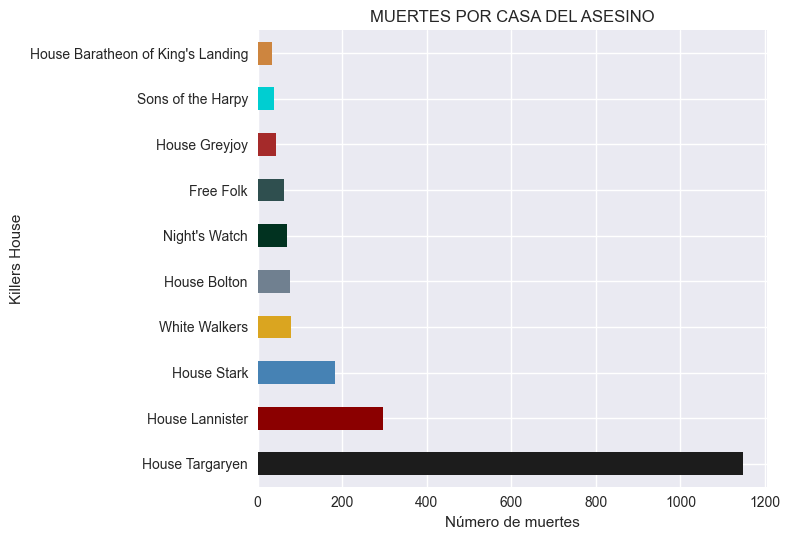

In [378]:
df_muertes_epi1['Killers House'] \
    .value_counts() \
    .head(10) \
    .plot(kind='barh',
          color=GOTcolors,
          title='MUERTES POR CASA DEL ASESINO')
plt.xlabel('Número de muertes')
plt.tight_layout()
plt.show()

## 📊 CONCLUSIÓN: 

No, a pesar de las innumerables batallas que hay en la serie, existen muchos métodos de asesinato. Si bien la memoria nos puede engañar, recordando que la mayoría de personajes mueren por arma blanca, sólo lo hacen así la mayoría de personajes relevantes. Sin embargo, la gran mayoría de persoajes generales mueren por fuego. Viendo las gráficas de métodos y asesinos, queda claro que el fuego pertenece a Drogon, uno de los dragones de Daenerys.


# 🗡 **HIPÓTESIS 4:**
### Las batallas no han estado igualadas

## ❔ ¿El ejército atacante ha ganado más veces que el atacado?​

Resultados de las batallas (desde el punto de vista del atacante):
attacker_outcome
win     32
loss     5
Name: count, dtype: int64


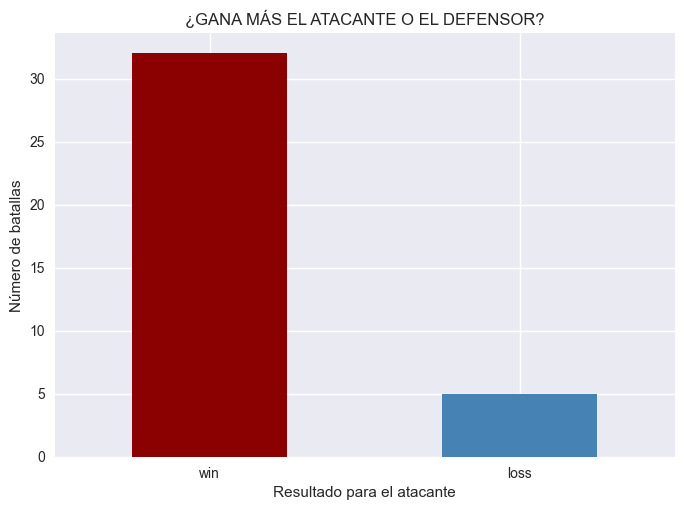

In [379]:
df_batallas_outcome = df_battles_clean.dropna(subset=["attacker_outcome"])

# Contamos cuántas veces ganó el atacante vs cuántas veces perdió
conteo_resultados = df_batallas_outcome["attacker_outcome"].value_counts()

# Mostramos los resultados
print("Resultados de las batallas (desde el punto de vista del atacante):")
print(conteo_resultados)

# Gráfico
import matplotlib.pyplot as plt

conteo_resultados.plot(kind="bar", color=["#8B0000","#4682B4"])
plt.title("¿GANA MÁS EL ATACANTE O EL DEFENSOR?")
plt.xticks(rotation=0)
plt.ylabel("Número de batallas")
plt.xlabel("Resultado para el atacante")
plt.show()


## ❔ ¿El ejercito con más miembros siempre ha ganado?

In [380]:
# Quitar NaNs
df_batallas_ejer = df_battles_clean.dropna(subset=["attacker_size", "defender_size", "attacker_outcome"])

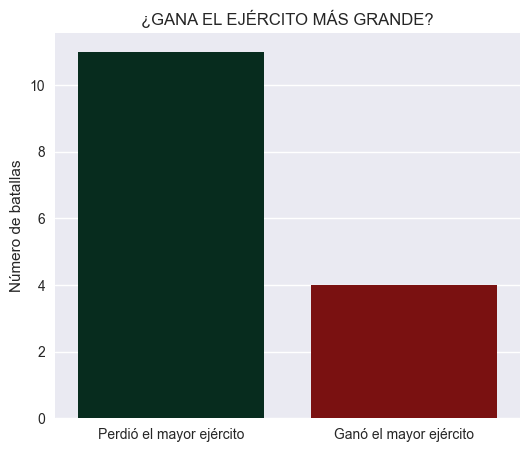

In [ ]:
# Creamos la columna 'mayor_ejercito' 
condicion_attacker = df_batallas_ejer["attacker_size"] > df_batallas_ejer["defender_size"]
condicion_defender = df_batallas_ejer["attacker_size"] < df_batallas_ejer["defender_size"]
condicion_empate = df_batallas_ejer["attacker_size"] == df_batallas_ejer["defender_size"]

df_batallas_ejer["mayor_ejercito"] = "empate"
df_batallas_ejer.loc[condicion_attacker, "mayor_ejercito"] = "attacker"
df_batallas_ejer.loc[condicion_defender, "mayor_ejercito"] = "defender"

# Creamos columna 'ganador'
df_batallas_ejer["ganador"] = df_batallas_ejer["attacker_outcome"].map({
    "win": "attacker",
    "loss": "defender"
})

# Paso 3: Comparar y contar
coinciden = df_batallas_ejer["mayor_ejercito"] == df_batallas_ejer["ganador"]
conteo = coinciden.value_counts().rename({
    True: "Ganó el mayor ejército",
    False: "Perdió el mayor ejército"
})

# Paso 4: Gráfico
plt.figure(figsize=(6,5))
sns.barplot(x=conteo.index, y=conteo.values, palette=["#013220", "#8B0000"])
plt.title("¿GANA EL EJÉRCITO MÁS GRANDE?")
plt.ylabel("Número de batallas")
plt.xlabel("")
plt.show()


In [383]:
"""df_ejercitos = df_battles_clean.dropna(subset=["attacker_size", "defender_size"])"""


'df_ejercitos = df_battles_clean.dropna(subset=["attacker_size", "defender_size"])'

## ❔ ¿Qué casa ha comenzado más batallas?

In [384]:
df_battles_clean['attacker_king'].value_counts()

attacker_king
Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: count, dtype: int64

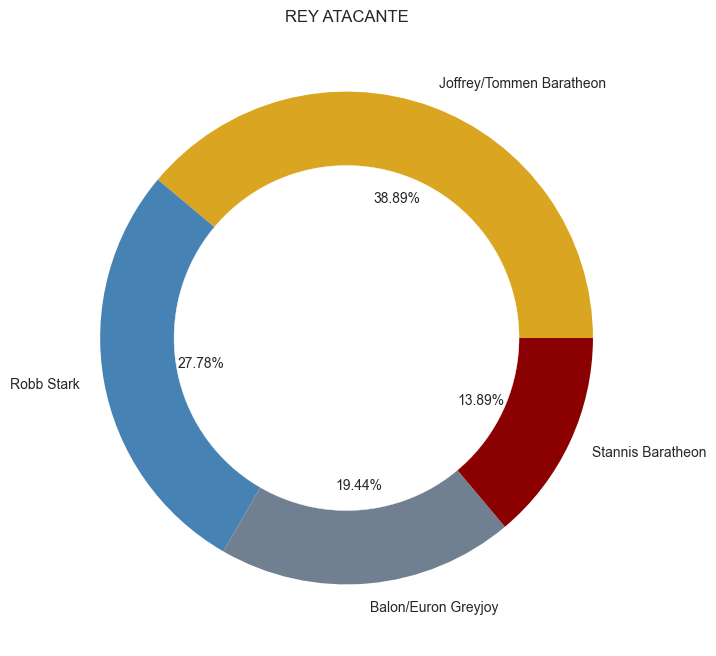

In [385]:
# create data
data = df_battles["attacker_king"].value_counts()


#  Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color="white")

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        colors=("#DAA520","#4682B4","#708090","#8B0000"),
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("REY ATACANTE");

## 📊 CONCLUSIÓN: 

Efectivamente, las batallas no han estado igualadas ni en número ni en resultado, aún así, ser el atacante o quien más soldados tiene, no siempre ha sido garantía de victoria.
